# Explorative Korpusanalyse des Gesamtdatensatzes

## Vorbereitung

Daten einlesen

In [1]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nlp = spacy.load('de_core_news_sm')

In [3]:
df = pd.read_excel('./data/df_de.xlsx')

In [4]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [5]:
update_astype_tweets(df)

Laden der Spacy Docs

In [6]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [7]:
load_spacy_docs_tweets(df, 'tweets_gesamt')

In [8]:
df.head()

Unnamed: 0  nr_flatfile  lfdnr_table  lfdnr  \
0           0            1            1      1   
1           1            1            1      2   
2           2            1            1      3   
3           3            1            1      4   
4           4            1            1      6   

                                          tweet_link   tweet_date_create  \
0  https://twitter.com/NrWinzidenz/status/1603121... 2022-12-14 20:16:02   
1  https://twitter.com/ulible/status/160312181948... 2022-12-14 20:16:40   
2  https://twitter.com/Tussipowerx3/status/160312... 2022-12-14 20:16:49   
3  https://twitter.com/MarVin070685/status/160312... 2022-12-14 20:18:04   
4  https://twitter.com/DeinzerHeinrich/status/160... 2022-12-14 20:18:22   

  tweet_creator_atName                     tweet_creator_screenName  \
0          NrWinzidenz      Wyldstyle | #KinderdurchseuchungStoppen   
1               ulible                             Spielworxx / Uli   
2         Tussipowerx3  Jurika 82 pflanzt🌳für Aufklärung über MECFS   
3         MarVin070685                                      Mar Vin   
4      DeinzerHeinrich                             Heinrich Deinzer   

                                   tweet_creator_bio  \
0  Jede Infektion ist eine zu viel. 🕯️ Konsequent...   
1  Spielworxx. Spiele. Iserlohner EC. Schalke. Na...   
2  #niemandbrauchtnazis; in Akutpsychiatrie als P...   
3  Dortmund Fan. Es gibt nur eine Rasse und die h...   
4                                                      

                                          tweet_text  ...  \
0  @mecfsbuch @nervensystemck #KleinschnitzRaussc...  ...   
1                                                     ...   
2  Es scheint so weit weg, so surreal, aber es fe...  ...   
3                                                     ...   
4                                                     ...   

  zitat_atName_creator_qouted_tweet    zitat_screenName_creator_qouted_tweet  \
0                       NrWinzidenz  Wyldstyle | #KinderdurchseuchungStoppen   
1                              -998                                     -998   
2                              -998                                     -998   
3                              -998                                     -998   
4                              -998                                     -998   

                      zitat_bio_creator_qouted_tweet  \
0  Jede Infektion ist eine zu viel. 🕯️ Konsequent...   
1                                               -998   
2                                               -998   
3                                               -998   
4                                               -998   

                                          zitat_text  \
0  #KleinschnitzRausschmiss bitte jetzt @Uniklini...   
1                                                      
2                                                      
3                                                      
4                                                      

                                      hashtags_tweet  \
0                        ['KleinschnitzRausschmiss']   
1                                                 []   
2  ['MEcfs', 'LongCovid', 'PostVac', 'MEAwareness...   
3                                                 []   
4                                                 []   

                     hashtags_retweet               hashtags_zitat  \
0                                  []  ['KleinschnitzRausschmiss']   
1  ['Wisskom', 'Brettspielforschung']                           []   
2                                  []                           []   
3                                  []                           []   
4                                  []                           []   

                                    spacy_doc_tweets  \
0  (@mecfsbuch, @nervensystemck, #, KleinschnitzR...   
1                                                 ()   
2  (Es, scheint, so, weit, weg, ,

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [9]:
df.shape

(81429, 29)

In [10]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [11]:
count_tweet_type(df)

Anzahl Tweets: 34000 (41.75% der Gesamtanzahl)
Anzahl Retweets: 47429 (58.25% der Gesamtanzahl)
Anzahl zitierte Tweets: 16618 (20.41% der Gesamtanzahl)


In [12]:
# Anzahl Accounts berechnen
df['tweet_creator_atName'].nunique()

35001

In [13]:
# Anzahl unterschiedlicher Bios berechnen
# Entferne Duplikate in der Kombination der beiden Spalten
unique_combinations_df = df.drop_duplicates(subset=['tweet_creator_atName', 'tweet_creator_bio'])

# Anzahl der eindeutigen Kombinationen der beiden Spalten
len(unique_combinations_df)

36317

### Token + Sentences

In [14]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result

In [15]:
counts = get_token_sent_counts(df)

  0%|          | 0/81429 [00:00<?, ?it/s]

  0%|          | 0/81429 [00:00<?, ?it/s]

  0%|          | 0/81429 [00:00<?, ?it/s]

In [16]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens  903908   1429220           516942
1  Sentences  117769    175171            59728

In [17]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [18]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', df) ,
        'Retweets': stats(counts, 'retweets', df) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', df) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  26.585529  30.133884        31.107353
1  Mean Sentences per Tweet   3.463794   3.693331         3.594175
2       Tokens per Sentence   7.675263   8.158999         8.654936

#### Type-Token Verhältnis

Lemmas extrahieren

In [19]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [20]:
lemmas_tweets = get_lemmas(df)

  0%|          | 0/81429 [00:00<?, ?it/s]

  0%|          | 0/81429 [00:00<?, ?it/s]

  0%|          | 0/81429 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [21]:
from lexical_diversity import lex_div as ld

In [22]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category    Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.094664  0.023256          0.04136

## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [24]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [25]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [26]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [27]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop 
            and not token.is_punct and not token.like_num]

In [28]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [29]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [30]:
common_words_tweets = common_words1(df, 'tweets')
common_words_retweets = common_words1(df, 'retweets')
common_words_zitat_tweets = common_words1(df, 'zitat_tweets')
common_words_all = common_words_all1(df)

In [31]:
common_words_retweets

word   freq
0          forschung  33104
1              mecfs   6050
2             pfizer   5243
3          longcovid   4395
4           brauchen   3887
5             mensch   3519
6       wissenschaft   3443
7        betroffener   3204
8         versorgung   3130
9   mecfsimbundestag   3125
10                 ️   2609
11     gof-forschung   2575
12            finden   2562
13       deutschland   2522
14            zeigen   2514
15               mal   2242
16               weg   2172
17            medium   2019
18               dr.   1981
19            studie   1949
20          spannend   1935
21  @karl_lauterbach   1813
22           wichtig   1795
23             legen   1680
24             lehre   1668
25              voll   1628
26          programm   1625
27             china   1599
28        enthüllung   1573
29       anerkennung   1567
30         bundestag   1516
31         verstehen   1499
32            robert   1480
33            wieler   1470
34       übersetzung   1468
35          resonanz   1455
36          löschung   1452
37     eingeständnis   1450
38     sonntagskrimi   1449
39      mrna-pionier   1449
40            malone   1449
41               bot   1449
42         derailing   1449
43           holprig   1449
44          forschen   1439
45            lothar   1420
46           bildung   1394
47             hilfe   1384
48       entwicklung   1372
49   @starkwatzinger   1353

In [32]:
common_words_zitat_tweets

word   freq
0          forschung  10184
1                  ️   2371
2      demonstrieren   2241
3                 --   2126
4              lehre   1946
5           brauchen   1881
6                  ➡   1869
7        information   1799
8             wieler   1782
9             lothar   1769
10           aufgabe   1738
11         gemeinsam   1733
12            widmen   1727
13               amt   1708
14                h.   1708
15             april   1659
16         verlässen   1647
17         professor   1634
18               rki   1633
19       niederlegen   1633
20       dankewieler   1625
21         @bmg_bund   1619
22  pressemitteilung   1603
23             mecfs   1300
24         longcovid   1299
25             china   1293
26             liebe   1256
27             klima   1207
28             falls   1193
29          dringend   1193
30               uni   1166
31              euer   1119
32         engagiert   1105
33     klimaschützer   1104
34          ansinnen   1104
35              ehre   1104
36          fleissig   1104
37             demos   1104
38               the    926
39            zeigen    834
40             covid    817
41                to    763
42      wissenschaft    741
43        versorgung    736
44        innovation    733
45  mecfsimbundestag    725
46                of    716
47            pfizer    687
48            mensch    664
49       entwicklung    653

In [33]:
common_words_all.head(50)

word   freq
0          forschung  68600
1              mecfs   8806
2       wissenschaft   7337
3           brauchen   7076
4          longcovid   6637
5             pfizer   6459
6                  ️   6052
7             mensch   5506
8              lehre   5048
9             finden   4958
10       betroffener   4441
11        versorgung   4348
12  mecfsimbundestag   4247
13               mal   4175
14       deutschland   4074
15            zeigen   3974
16                --   3902
17            studie   3565
18            wieler   3431
19                     3424
20  @karl_lauterbach   3370
21            lothar   3269
22             china   3147
23                 ➡   3135
24       entwicklung   3102
25     demonstrieren   3097
26         professor   3022
27           bildung   2988
28           wichtig   2972
29       dankewieler   2972
30       information   2886
31           aufgabe   2866
32               weg   2790
33        innovation   2752
34     gof-forschung   2706
35         gemeinsam   2623
36            widmen   2596
37         @bmg_bund   2586
38             thema   2580
39              geld   2569
40               rki   2531
41               dr.   2529
42                h.   2526
43   @starkwatzinger   2488
44          spannend   2462
45               amt   2435
46            medium   2411
47             covid   2399
48                of   2389
49             april   2336

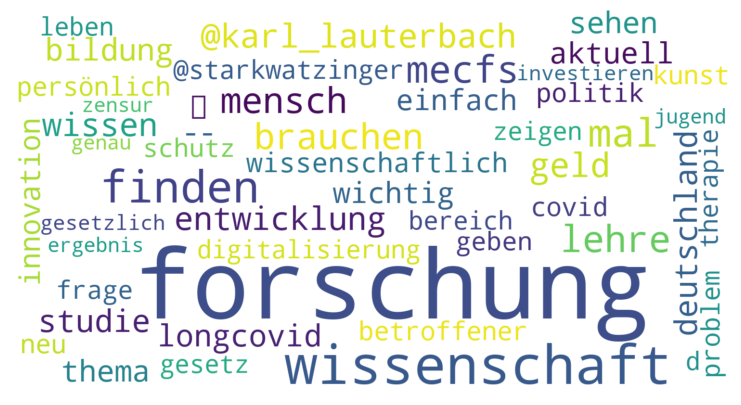

In [34]:
create_wordcloud(common_words_tweets)

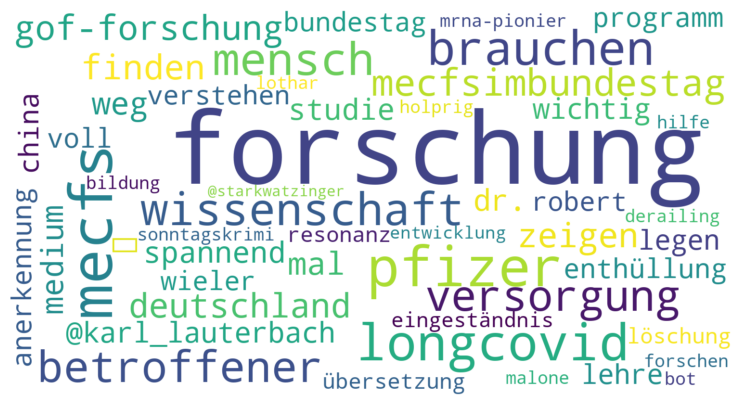

In [35]:
create_wordcloud(common_words_retweets)

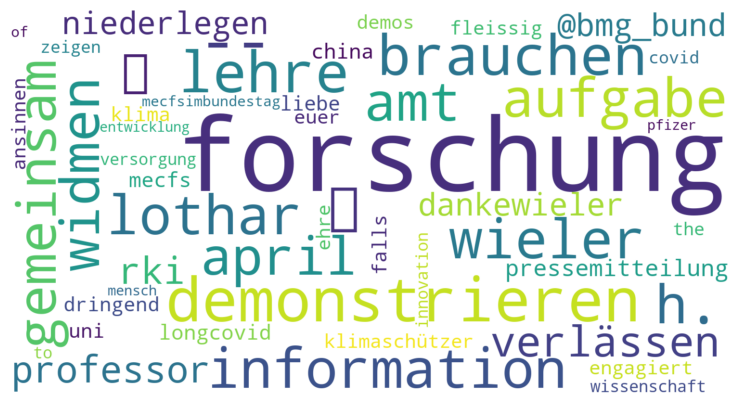

In [36]:
create_wordcloud(common_words_zitat_tweets)

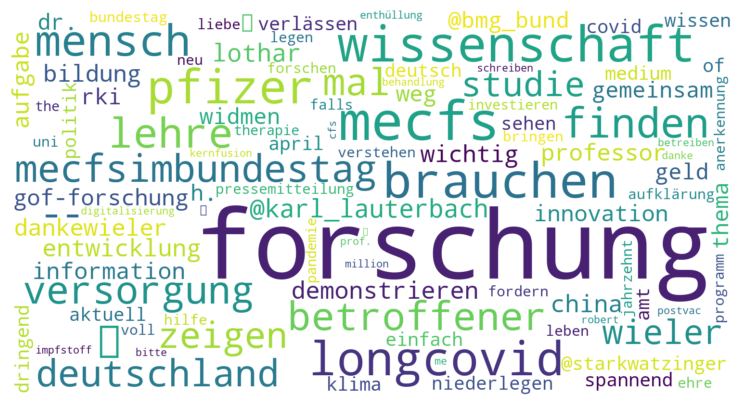

In [37]:
create_wordcloud(common_words_all)

#### Die häufigsten Wörter 2 - ohne Stoppwörter und Hashtags

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [40]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [41]:
common_words_tweets2 = common_words2(df['tweet_text'])
common_words_retweets2 = common_words2(df['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(df['zitat_text'])
common_words_all2 = common_words_all2(df)

In [42]:
common_words_tweets2

word   freq
0   forschung  22234
1         die   4296
2         das   3148
3         sie   3056
4         ich   2277
..        ...    ...
95        the    376
96     lassen    374
97      zeigt    373
98        ihr    370
99  millionen    368

[100 rows x 2 columns]

In [43]:
common_words_retweets2

word   freq
0   forschung  28798
1         die   8251
2         sie   5762
3         wir   4700
4          es   4411
..        ...    ...
95      lässt    906
96    politik    901
97        who    901
98   aufgaben    899
99       fast    885

[100 rows x 2 columns]

In [44]:
common_words_zitat_tweets2

word  freq
0     forschung  9463
1           die  2081
2         lehre  1909
3            er  1784
4        lothar  1769
..          ...   ...
95  anerkennung   310
96           it   305
97            s   297
98           by   295
99          von   293

[100 rows x 2 columns]

In [45]:
common_words_all2

word   freq
0       forschung  60495
1             die  14628
2             sie   9826
3             das   8257
4             wir   8147
..            ...    ...
95    betroffenen   1555
96         malone   1537
97       resonanz   1525
98           bots   1524
99  eingeständnis   1523

[100 rows x 2 columns]

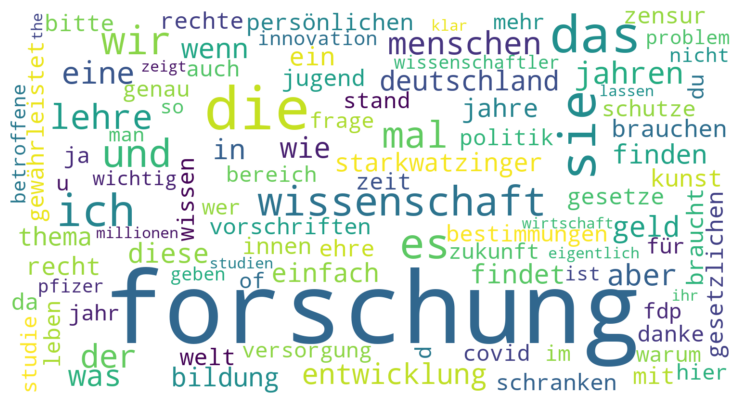

In [46]:
create_wordcloud(common_words_tweets2)

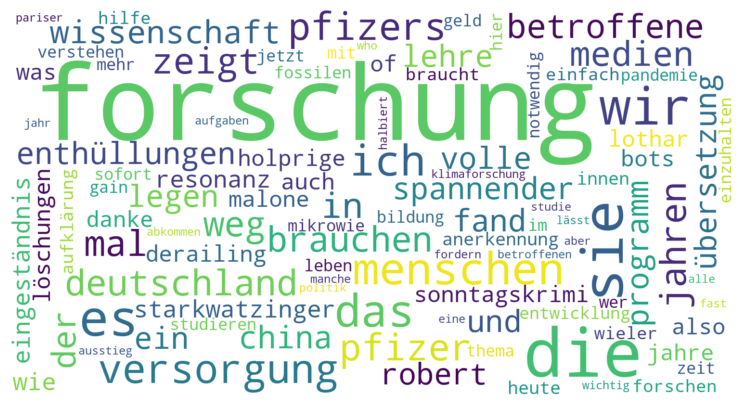

In [47]:
create_wordcloud(common_words_retweets2)

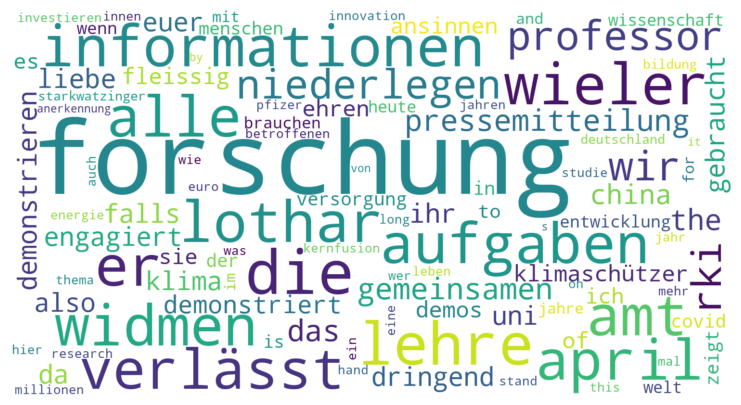

In [48]:
create_wordcloud(common_words_zitat_tweets2)

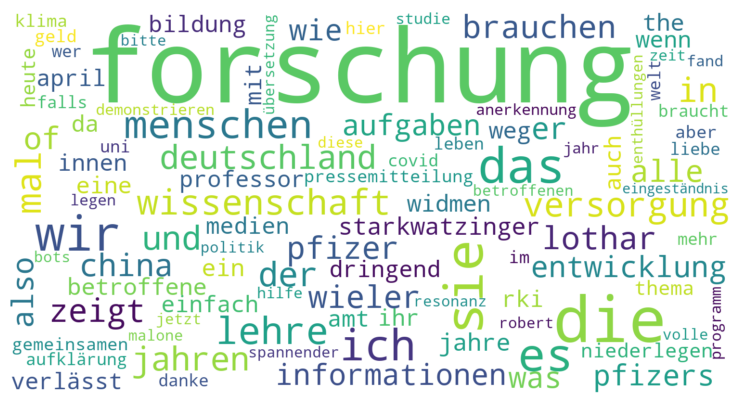

In [49]:
create_wordcloud(common_words_all2)

#### Häufigste Adjektive

In [50]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [51]:
# Häufigste Adjektive extrahieren
adjectives_tweets = common_adjectives(df, 'tweets')
adjectives_retweets = common_adjectives(df, 'retweets')
adjectives_zitat_tweets = common_adjectives(df, 'zitat_tweets')

In [52]:
adjectives_tweets

word  freq
0           neue   977
1   persönlichen   588
2    allgemeinen   572
3   gesetzlichen   563
4          neuen   452
..           ...   ...
95    empirische    56
96  berüchtigten    56
97         grüne    55
98       falsche    55
99        großes    54

[100 rows x 2 columns]

In [53]:
adjectives_retweets

word  freq
0                 volle  1556
1              holprige  1449
2                  neue  1399
3                 neuen  1219
4               pariser   944
..                  ...   ...
95         behördlichen   124
96  neuroimmunologische   124
97              höchste   118
98               milden   118
99              globale   118

[100 rows x 2 columns]

In [54]:
adjectives_zitat_tweets

word  freq
0         neuen  1988
1   gemeinsamen  1595
2         liebe  1126
3          neue   518
4      nächsten   255
..          ...   ...
95    ehrlicher    38
96    ermordete    37
97     schweren    37
98     neuesten    37
99      kleinen    36

[100 rows x 2 columns]

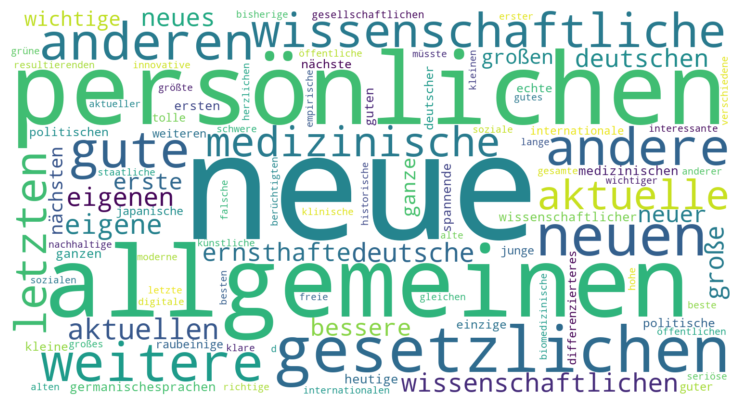

In [55]:
create_wordcloud(adjectives_tweets)

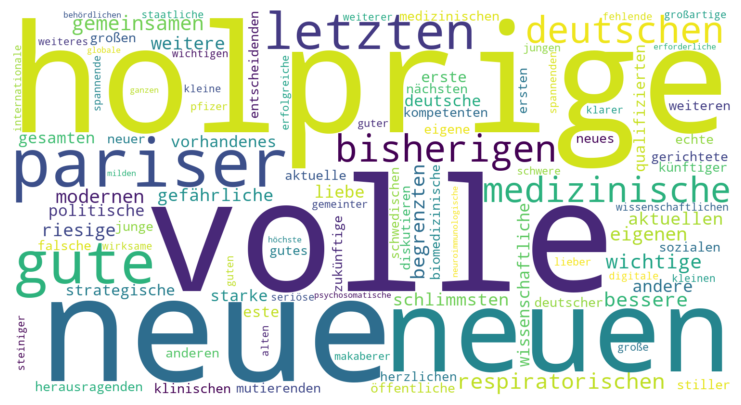

In [56]:
create_wordcloud(adjectives_retweets)

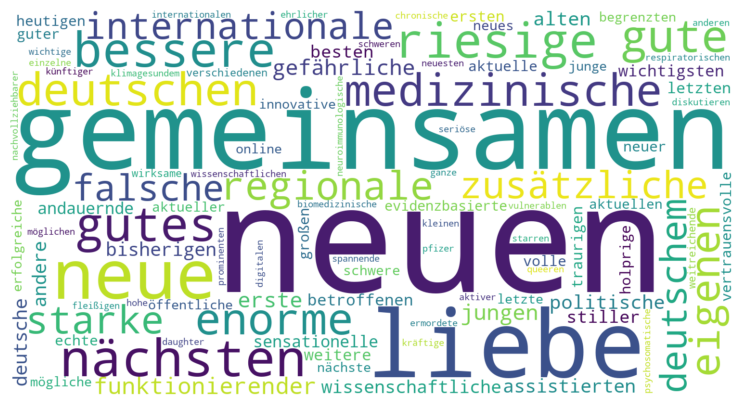

In [57]:
create_wordcloud(adjectives_zitat_tweets)

#### Häufigste Nomen 

In [58]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [59]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [60]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [61]:
common_nouns_tweets = common_nouns(df, 'tweets')
common_nouns_retweets = common_nouns(df, 'retweets')
common_nouns_zitat_tweets = common_nouns(df, 'zitat_tweets')

In [62]:
common_nouns_tweets

word   freq
0          forschung  25110
1       wissenschaft   2843
2              lehre   1424
3             mensch   1321
4               geld   1167
5        entwicklung   1074
6            bildung    953
7              thema    922
8             studie    885
9         innovation    789
10           politik    692
11             kunst    686
12       betroffener    663
13            schutz    653
14             frage    639
15           problem    635
16            gesetz    622
17           bereich    611
18          therapie    604
19   digitalisierung    588
20          ergebnis    577
21            jugend    574
22              ehre    574
23            zensur    573
24        bestimmung    565
25        vorschrift    562
26          schranke    560
27   @starkwatzinger    553
28              frau    526
29              kind    508
30       technologie    487
31           zukunft    483
32        versorgung    478
33             stand    478
34            pfizer    469
35   wissenschaftler    459
36           projekt    457
37              land    456
38        wirtschaft    427
39           energie    414
40             danke    407
41           medizin    405
42             leben    396
43  mecfsimbundestag    396
44              welt    393
45        medikament    391
46            arbeit    390
47           million    388
48        kernfusion    376
49            wissen    363

In [63]:
common_nouns_retweets

word   freq
0          forschung  32940
1             mensch   3519
2             pfizer   3502
3       wissenschaft   3361
4   mecfsimbundestag   3124
5        betroffener   3114
6         versorgung   3078
7      gof-forschung   2575
8             medium   2015
9                dr.   1981
10            studie   1728
11             lehre   1657
12          programm   1582
13        enthüllung   1573
14       anerkennung   1567
15         bundestag   1500
16       übersetzung   1468
17          resonanz   1455
18          löschung   1452
19     eingeständnis   1450
20               bot   1449
21           bildung   1386
22             hilfe   1381
23       entwicklung   1367
24        aufklärung   1308
25                 🇪   1303
26             thema   1291
27         professor   1268
28         jahrzehnt   1255
29           politik   1236
30              geld   1177
31          pandemie   1176
32       dankewieler   1175
33        innovation   1145
34             danke   1054
35   digitalisierung   1048
36   @starkwatzinger    995
37             prof.    976
38    klimaforschung    963
39           aufgabe    950
40          ausstieg    947
41         ee-ausbau    946
42           fossile    943
43          abkommen    942
44              arzt    938
45        behandlung    935
46       information    910
47          therapie    900
48           projekt    883
49         impfstoff    880

In [64]:
common_nouns_zitat_tweets

word   freq
0          forschung  10142
1              lehre   1944
2        information   1770
3            aufgabe   1738
4                amt   1708
5              april   1659
6          professor   1633
7        dankewieler   1625
8   pressemitteilung   1603
9                  ➡   1598
10             klima   1206
11               uni   1160
12     klimaschützer   1104
13          ansinnen   1104
14              ehre   1104
15        versorgung    733
16  mecfsimbundestag    725
17      wissenschaft    720
18            mensch    664
19       entwicklung    653
20           bildung    631
21            studie    587
22            pfizer    571
23              welt    535
24       betroffener    509
25        kernfusion    493
26        innovation    459
27              euro    455
28            chance    428
29         impfstoff    399
30           energie    394
31         bundestag    385
32   @starkwatzinger    382
33             thema    366
34       klimawandel    344
35              hand    341
36           million    340
37             prof.    329
38             stand    316
39       anerkennung    312
40        behandlung    312
41             leben    305
42             hilfe    282
43             woche    280
44        ausbildung    278
45         jahrzehnt    271
46            dekade    269
47           februar    265
48       klimaretter    265
49        medikament    260

##### Wordclouds

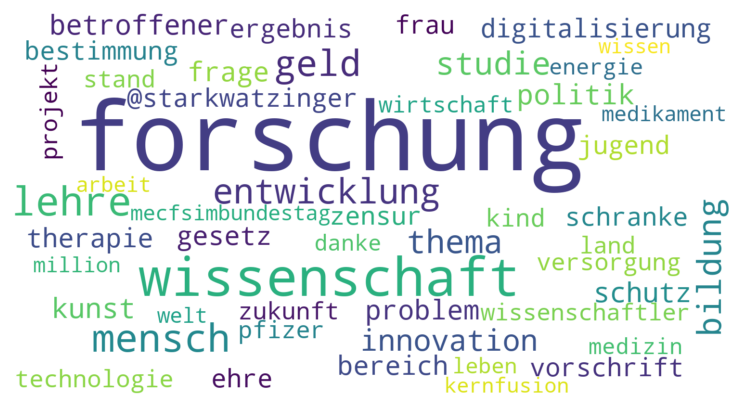

In [65]:
create_wordcloud(common_nouns_tweets)

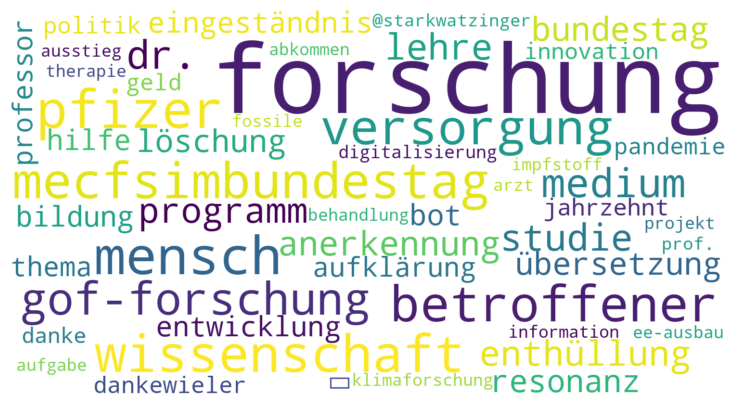

In [66]:
create_wordcloud(common_nouns_retweets)

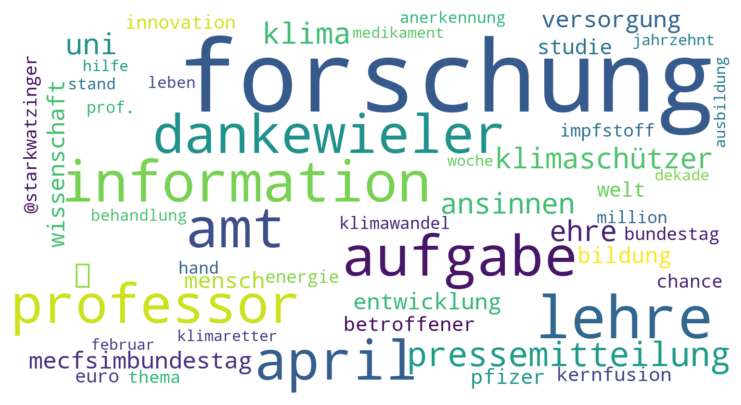

In [67]:
create_wordcloud(common_nouns_zitat_tweets)

## Analyse der Hashtags

In [76]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [77]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#MECFS: 7115
#Forschung: 6497
#LongCovid: 5205
#MECFSimBundestag: 3734
#DankeWieler: 2805
#Wissenschaft: 2751
#Digitalisierung: 1493
#DigitaleTransformation: 1273
#PostVac: 1197
#Pfizer: 950
#NichtGenesen: 948
#Corona: 932
#KI: 856
#MEcfs: 781
#mecfs: 770
#Unternehmenssoftware: 762
#Stuttgart: 731
#postvac: 670
#Meinungsfreiheit: 656
#Zensur: 652
#Berlin: 622
#Impfschaeden: 572
#Innovation: 571
#forschung: 564
#Klimawandel: 559
#Kernfusion: 541
#Politik: 535
#Bildung: 523
#Zukunftsstrategie: 520
#FDP: 503


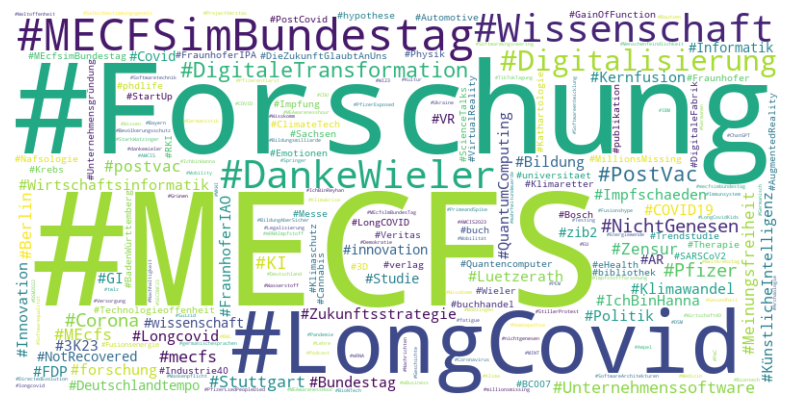

In [78]:
count_hashtags_all(df)

In [79]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [80]:
count_hashtags_seperate(df)

Top hashtags in tweet_text:
#Forschung: 2518
#Wissenschaft: 899
#MECFS: 860
#LongCovid: 662
#Digitalisierung: 494
#DigitaleTransformation: 404
#MECFSimBundestag: 379
#forschung: 309
#wissenschaft: 285
#KI: 281
#Physik: 254
#Therapie: 251
#Unternehmenssoftware: 239
#verlag: 235
#hypothese: 234
#buchhandel: 234
#universitaet: 234
#bibliothek: 234
#buch: 234
#Kathartologie: 234

Top hashtags in retweet_text_retweeted_tweet:
#MECFS: 5009
#LongCovid: 3468
#Forschung: 3386
#MECFSimBundestag: 2772
#Wissenschaft: 1707
#DankeWieler: 1039
#PostVac: 988
#Digitalisierung: 971
#DigitaleTransformation: 864
#NichtGenesen: 710
#Meinungsfreiheit: 624
#Zensur: 622
#Pfizer: 591
#MEcfs: 571
#postvac: 544
#KI: 534
#Impfschaeden: 528
#Unternehmenssoftware: 522
#Stuttgart: 496
#mecfs: 485

Top hashtags in zitat_text:
#DankeWieler: 1624
#MECFS: 1246
#LongCovid: 1075
#Forschung: 593
#MECFSimBundestag: 583
#Klimawandel: 351
#Corona: 343
#Luetzerath: 285
#innovation: 274
#Klimaretter: 266
#ClimateTech: 265
#Zuku